In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
%matplotlib notebook

In [3]:
t_short = 1
t_long = 10

fsamp = 5000

freq = 18
amp = 1

noise_rms = 0.1


#####

def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))

dt = 1. / fsamp
nsamp_short = int(t_short / dt)
nsamp_long = int(t_long / dt)

time_short = np.arange(nsamp_short) * dt
time_long= np.arange(nsamp_long) * dt

sig_short = amp * np.sin(2 * np.pi * freq * time_short) + noise_rms * np.random.randn(nsamp_short)
sig_long = amp * np.sin(2 * np.pi * freq * time_long)+ noise_rms * np.random.randn(nsamp_long)

In [14]:
fft_s.shape, freq.shape

((2501,), (25001,))

<IPython.core.display.Javascript object>


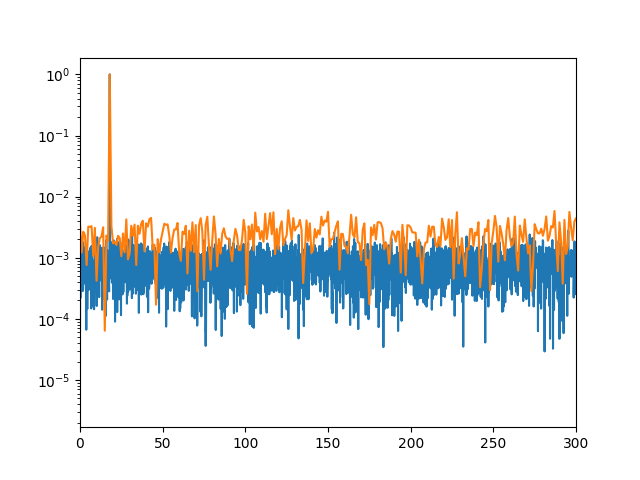

short mean:  6.159724963811672
std:  3.1709293693391043
long mean:  19.40530511260781
std:  10.093293681614924


In [16]:
_,ax = plt.subplots()
freq = np.fft.rfftfreq(nsamp_long, 1/fsamp)
fft = np.abs(np.fft.rfft(sig_long))

freq_s = np.fft.rfftfreq(nsamp_short, 1/fsamp)
fft_s = np.abs(np.fft.rfft(sig_short))

ax.semilogy(freq, fft/np.max(fft))
ax.semilogy(freq_s, fft_s/np.max(fft_s))
ax.set(xlim=(0,300))

print('short mean: ', np.mean(fft_s[(freq_s>50)*(freq_s<300)]))
print('std: ', np.std(fft_s.flatten()[(freq_s>50)*(freq_s<300)]))

print('long mean: ', np.mean(fft[(freq>50)*(freq<300)]))
print('std: ', np.std(fft.flatten()[(freq>50)*(freq<300)]))

In [18]:
psd_short, freqs_short = mlab.psd(sig_short, NFFT=fsamp, Fs=fsamp, window=mlab.window_none)
psd_long, freqs_long = mlab.psd(sig_long, NFFT=fsamp, Fs=fsamp, window=mlab.window_none)

psd_short2, freqs_short2 = mlab.psd(sig_short, NFFT=fsamp, Fs=fsamp, window=mlab.window_none)
psd_long2, freqs_long2 = mlab.psd(sig_long, NFFT=fsamp, Fs=fsamp, window=mlab.window_none)

fftfreqs_short = np.fft.rfftfreq(nsamp_short, d=dt)
fftfreqs_long = np.fft.rfftfreq(nsamp_long, d=dt)

fft_short = np.fft.rfft(sig_short)
fft_long = np.fft.rfft(sig_long)

In [334]:
from scipy.fftpack import fft, ifft

amps = []
a_real = []
a_img = []
for i in range(1000):
    norm_test = fft_norm(nsamp_short, fsamp)
    amp_= np.random.normal(amp,0.1)
    phase_ = np.random.normal(np.pi/10, np.pi/10/10)
    sig_short_test = amp_ * np.cos(2 * np.pi * freq * time_long + phase_) + noise_rms * np.random.randn(nsamp_long)
    fftfreqs_short_test = np.fft.fftfreq(nsamp_long, d=dt)
    fft_short_test = fft(sig_short_test)

    drive_bin = np.argmax(np.abs(fft_short_test))
    a_real.append(fft_short_test[drive_bin])
    a_img.append(fftfreqs_short_test[drive_bin])
    test_amp = norm_test * np.sqrt((fft_short_test * fft_short_test.conj()).real[drive_bin])
#     test_amp *= np.sqrt(2) * (1.0 / np.sqrt(t_long))
    amps.append(test_amp)

print(amp, np.mean(amps), np.std(amps))
# print('Recovered amplitude : {:0.3f}+-{:0.3f}'.format(np.mean(amps), np.std(amps)))

1 2.2326575359629786 0.22805671188054685


<IPython.core.display.Javascript object>


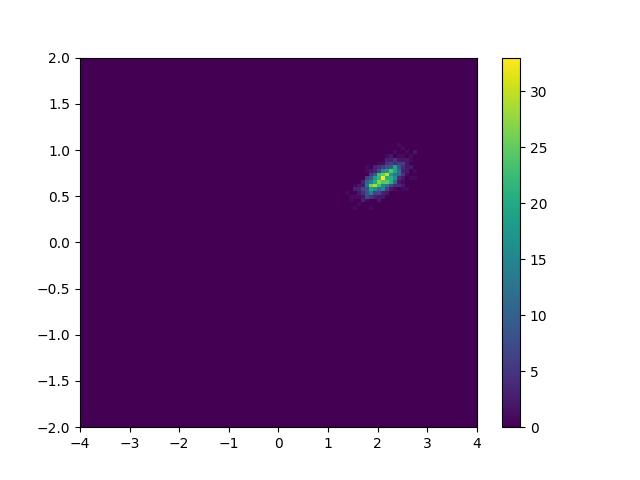

In [336]:
import matplotlib.colors
reals = norm_test*np.real(a_real)
imgs = norm_test*np.imag(a_real)
realss = (norm_test*np.imag(a_real))
fig,ax = plt.subplots()
plt.hist2d(reals,realss,range=[(-4,4),(-2,2)],bins=(100,100),cmap=matplotlib.cm.viridis)
plt.colorbar()

<IPython.core.display.Javascript object>


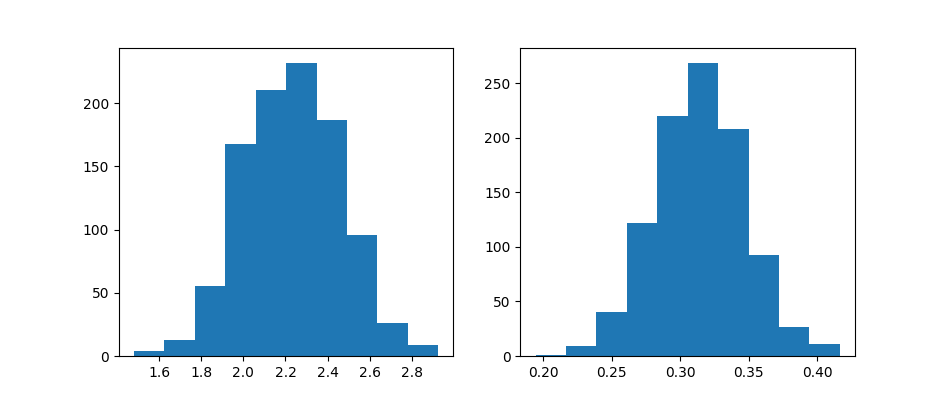

(0.3143152738700469, 1.2566370614359172)

In [339]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(norm_test*np.abs(a_real))
ax[1].hist(np.angle(a_real))
np.mean(np.abs(np.angle(a_real))), np.pi/2-np.pi/10

<IPython.core.display.Javascript object>


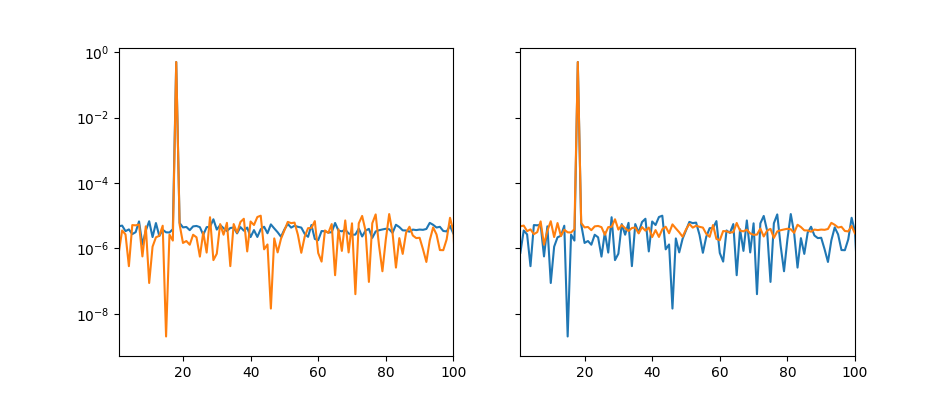

[[(1, 100)], [(1, 100)]]

In [19]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
ax[0].semilogy(freqs_long[1:], psd_long[1:], label='Long: mlab.psd()')
ax[0].semilogy(freqs_short[1:], psd_short[1:], label='Short: mlab.psd()')
ax[1].semilogy(freqs_short2[1:], psd_short2[1:], label='Short2: mlab.psd()')
ax[1].semilogy(freqs_long2[1:], psd_long2[1:], label='Long2: mlab.psd()')
[a.set(xlim=(1,100)) for a in ax]

### Bandpass

In [94]:
t_long = 10.

fsamp = 5000.

freq = 170.
amp = np.pi

noise_rms = 0.3
dt = 1. / fsamp
nsamp_long = int(t_long / dt)
time_long= np.arange(nsamp_long) * dt
sig_long = noise_rms * np.random.randn(nsamp_long) ##+ amp * np.sin(2 * np.pi * freq * time_long)

<IPython.core.display.Javascript object>


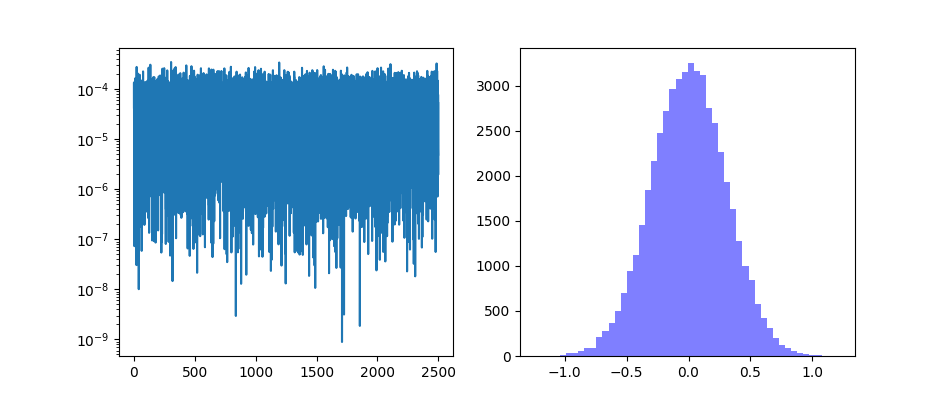

In [114]:
psd_noise, freqs_noise = mlab.psd(sig_long, NFFT=nsamp_long, Fs=fsamp, window=mlab.window_none)
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(freqs_noise, psd_noise)
# ax[0].scatter(time_long,sig_long)
num_bins=50
_ = ax[1].hist(sig_long, num_bins, facecolor='blue', alpha=0.5)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


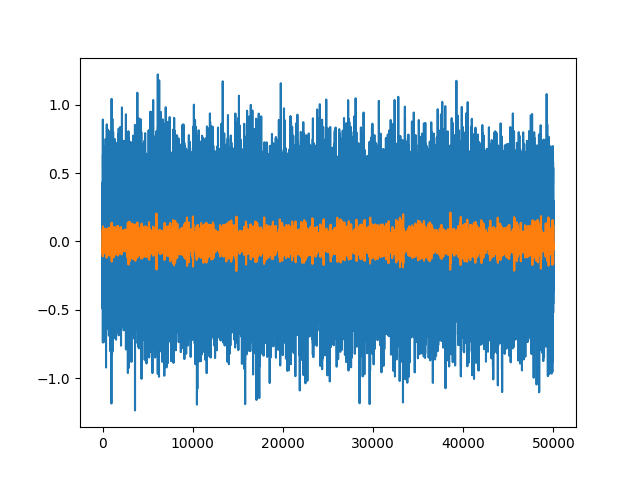

In [121]:
from scipy import signal
bandwidth = 100
drive_freq=150
b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
sig_long2 = signal.filtfilt(b, a, sig_long)

_,ax = plt.subplots()
ax.plot(range(50000), sig_long)
ax.plot(range(50000), sig_long2)

<IPython.core.display.Javascript object>


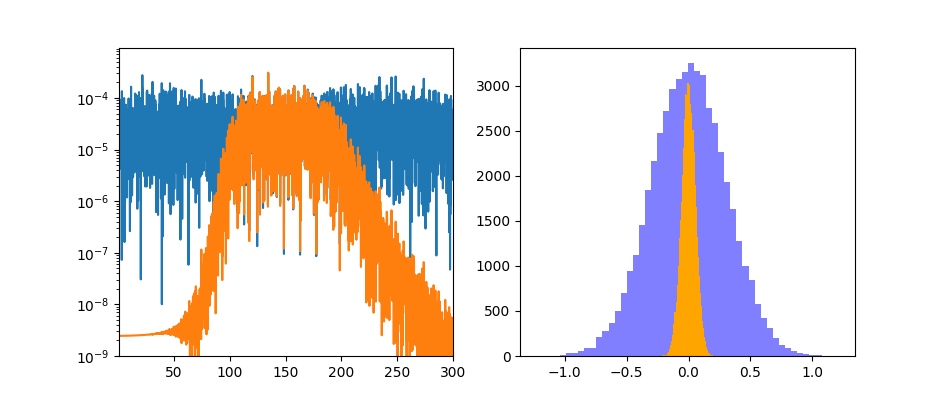

In [134]:
psd_noise2, freqs_noise2 = mlab.psd(sig_long2, NFFT=nsamp_long, Fs=fsamp, window=mlab.window_none)
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(freqs_noise, psd_noise)
ax[0].semilogy(freqs_noise2, psd_noise2)
ax[0].set(xlim=(1,300), ylim=(1e-9,None))
num_bins=50
_ = ax[1].hist(sig_long, num_bins, facecolor='blue', alpha=0.5)
_ = ax[1].hist(sig_long2, num_bins, facecolor='orange', alpha=1)